### IS727272 - Cordero Hernández, Marco Ricardo

# M4_1_4 AIDS Incidence, Gradient Descent

The regression model is a statistical procedure that allows a researcher to estimate the linear, or straight line, relationship that relates two or more variables.

The programming algorithm for implementing a regression model using the Gradient Descent is:

    1. Load the dataset, normalize the matrix X, and add a ones column for W0.
    2. Intialize W, and calculate the gradient for that W.
    3. While the gradient be greater than epsilon, calculate:
       - The gradient for the current W
       - Update the value of the next W
    4. Obtain the Cost Function with the las value of W
   

## 1. Load the dataset, and add column for W0



In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv
from numpy.linalg import norm

In [3]:
# 1. Load the dataset and convert to X and Y arrays.

def loadCSV(filename):
    data = pd.read_csv(f'./Datasets/{filename}')
    x = np.array(data['Time'])
    y = np.array(data['Cases'])
    x = np.reshape(x, (len(x), 1))
    y = np.reshape(y, (len(y), 1))
    
    return x, y

filename = 'AIDScases.csv'
x, y = loadCSV(filename)
print(f'X size: {np.shape(x)}  Y size: {np.shape(y)}')

X size: (25, 1)  Y size: (25, 1)


## Preparing the data
When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge
much more quickly.

- Subtract the mean of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

$$
X_{norm} = \frac{X - \mu_X}{\sigma}
$$

To get the standard deviation you can use `numpy.ndarray.std`


In [4]:
def normalize(x):
    return (x - np.mean(x, axis = 0)) / (np.ndarray.std(x, axis = 0))

X_norm = normalize(x)

print(np.shape(X_norm))
print(X_norm)

(25, 1)
[[-1.66410059]
 [-1.52542554]
 [-1.38675049]
 [-1.24807544]
 [-1.10940039]
 [-0.97072534]
 [-0.83205029]
 [-0.69337525]
 [-0.5547002 ]
 [-0.41602515]
 [-0.2773501 ]
 [-0.13867505]
 [ 0.        ]
 [ 0.13867505]
 [ 0.2773501 ]
 [ 0.41602515]
 [ 0.5547002 ]
 [ 0.69337525]
 [ 0.83205029]
 [ 0.97072534]
 [ 1.10940039]
 [ 1.24807544]
 [ 1.38675049]
 [ 1.52542554]
 [ 1.66410059]]


In [5]:
# Adding column 1 to the X matrix

def addOnes(X):
    ones = np.ones((len(X), 1))
    X1 = np.concatenate((ones, X), axis = 1)

    return X1

x = addOnes(X_norm)
print(np.shape(x))
print(x)

(25, 2)
[[ 1.         -1.66410059]
 [ 1.         -1.52542554]
 [ 1.         -1.38675049]
 [ 1.         -1.24807544]
 [ 1.         -1.10940039]
 [ 1.         -0.97072534]
 [ 1.         -0.83205029]
 [ 1.         -0.69337525]
 [ 1.         -0.5547002 ]
 [ 1.         -0.41602515]
 [ 1.         -0.2773501 ]
 [ 1.         -0.13867505]
 [ 1.          0.        ]
 [ 1.          0.13867505]
 [ 1.          0.2773501 ]
 [ 1.          0.41602515]
 [ 1.          0.5547002 ]
 [ 1.          0.69337525]
 [ 1.          0.83205029]
 [ 1.          0.97072534]
 [ 1.          1.10940039]
 [ 1.          1.24807544]
 [ 1.          1.38675049]
 [ 1.          1.52542554]
 [ 1.          1.66410059]]


## 2. Intialize W, and calculate the gradient for that W


The gradient is: $$ \nabla J(W) = \frac{\partial J(W) }{\partial W} = \frac{\partial}{\partial W} (Y - XW)^2 = -2X^T(Y-XW)$$

In [6]:
# Initialize W -- W's quantity depends of the amount of X's
m, n = np.shape(x)
print(m, n)

initw = np.zeros((1, n))

print(initw)

25 2
[[0. 0.]]


In [7]:
# Calculating Gradient

def gradient(X, Y, W):
    error = Y - np.dot(X, W.T)
    grad = -2 * np.dot(X.T, error)
    
    return grad

# Testing gradient function

Gradiente = gradient(x, y, initw)
print(Gradiente)

[[-150776.        ]
 [-124817.80610431]]


## 3. Gradient Descent iteration

While the gradient be greater than epsilon, calculate
       - The gradient for the current W
       - Update the value of the next W


### 3.1 Measure the total error of the algorthim

Evaluate the model performance for each power of data by using Residual Sum of Square (RSS): $$RSS(w) = \frac{1}{2N}\sqrt{\sum_{i=1}^{N} (y_i - x_i w)^2}$$

In [8]:
import math
def rss(Y, Yt):
    error = Y - Yt
    cost = math.sqrt(np.dot(error.T, error)) /  (2 * len(Y))
    
    return cost

In [10]:
#Gradient Descent with epsilon

def GD(X, Y, W, alpha, epsilon):
    grad = gradient(X, Y, W)
    gradnorm = np.linalg.norm(grad)
    it = 0
    J = []
    
    while gradnorm > epsilon:
        grad = gradient(X, Y, W)
        gradnorm = np.linalg.norm(grad)
        W -= np.dot(alpha, grad.T)
        it += 1
        Yt = np.dot(X, W.T) # Predicción
        J.append(rss(Y, Yt))
    
    return W, it, J

# Testing GD
w, iterations, J = GD(x, y, initw, 0.00001, 0.00001)
print(w, iterations)

[[3015.51999985 2496.35612196]] 47385


In [11]:
# Calculate de total error of the algorithm con los ultimos valores de w
yt = np.dot(x, w.T)

costo = rss(y, yt)

print(costo)

73.60258428364298


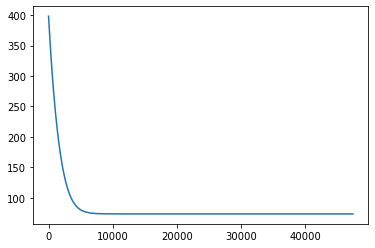

In [12]:
# Graficar la función de Costo

plt.plot(J)

## Polynomial features

Add polynomial features to observe the cost performance.

12.63574813388023


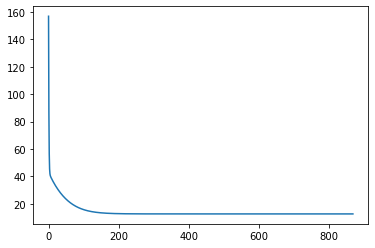

In [15]:
# Obtener datos
filename = 'AIDScases.csv'
x, y = loadCSV(filename)

# Agregar columna del cuadrado de X
x = np.concatenate((x, x*x), axis = 1)
x = np.array(x)

# Normalizar
X_norm = normalize(x)

# Agregar columna de 1's
x = addOnes(X_norm)

m, n = np.shape(x)

# Inicializar W
initw = np.zeros((1, n))

# Gradiente descendente
w, iterations, J = GD(x, y, initw, 0.01, 0.01)

# Calcular costo
yt = np.dot(x, w.T)
costo = rss(y, yt)

print(costo)

#Graficar
plt.plot(J)

12.41749057721845


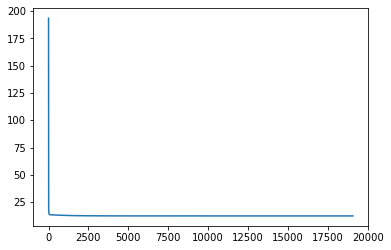

In [21]:
#Adding the x^2 + x^3 to the X matrix

# Obtener datos
filename = 'AIDScases.csv'
x, y = loadCSV(filename)

# Agregar columna del cuadrado de X
x = np.concatenate((x, x*x, x**3), axis = 1)
x = np.array(x)

# Normalizar
X_norm = normalize(x)

# Agregar columna de 1's
x = addOnes(X_norm)

m, n = np.shape(x)

# Inicializar W
initw = np.zeros((1, n))

# Gradiente descendente
w, iterations, J = GD(x, y, initw, 0.01, 0.01)

# Calcular costo
yt = np.dot(x, w.T)
costo = rss(y, yt)

print(costo)

#Graficar
plt.plot(J)